# NLP: US Airlines Tweets Sentiment Analysis


## **Context:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

- The purpose of this analysis is to classify positive, neutral or negative sentiments from posted tweets to help US airlines in improving customer support and their services.

#### Importing libraries, loading dataset, data shape and description

In [1]:
# install and import necessary libraries.

#!conda activate name_of_your_environment
#!pip install contractions

import re, string, unicodedata                          
import contractions                                     
from bs4 import BeautifulSoup                           

import numpy as np                                      
import pandas as pd                                     
import nltk                                             

# nltk.download('stopwords')                              # Download if needed.
# nltk.download('punkt')
# nltk.download('wordnet')

#! pip install emoji
import emoji

from nltk.corpus import stopwords                       
from nltk.tokenize import word_tokenize, sent_tokenize  
from nltk.stem.wordnet import WordNetLemmatizer         

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
sns.set_context("talk", font_scale=0.9) #for automatic larfer fonts on plots

In [5]:
df=pd.read_csv('Tweets.csv') # data loading

In [6]:
df.shape                     # shape of data.

(14640, 15)


 - Realtively small data set with almost 15,000 rows

In [7]:
df.head()                                              # Printing first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


- Many NaN missing values

In [8]:
df.isna().sum(axis=0)                                # Check for NaN and NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
df.isnull().sum(axis=0) 

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

#### Insights:
 - Luckely, there are no missing values in target columns: airline_sentiment and text
 - Also, airline column is not having missing values and will be used in EDA part only, in addition to the target columns

### Understanding data-columns: 
   1. Drop all other columns except “text” and “airline_sentiment”.
   2. Check the shape of data.
   3. Print first 5 rows of data.

In [126]:
# with airline column - see justification above 

df1=df[['airline_sentiment', 'airline', 'text']]

In [11]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

df1.head()                                 # Check first 5 rows of data

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing about it


In [125]:
df1.shape

(14640, 3)

In [12]:
df1.dtypes

airline_sentiment    object
airline              object
text                 object
dtype: object

<AxesSubplot:xlabel='airline_sentiment', ylabel='Probability'>

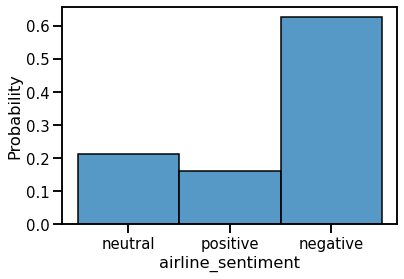

In [13]:
sns.histplot(df1['airline_sentiment'], binwidth=0.3, stat='probability')

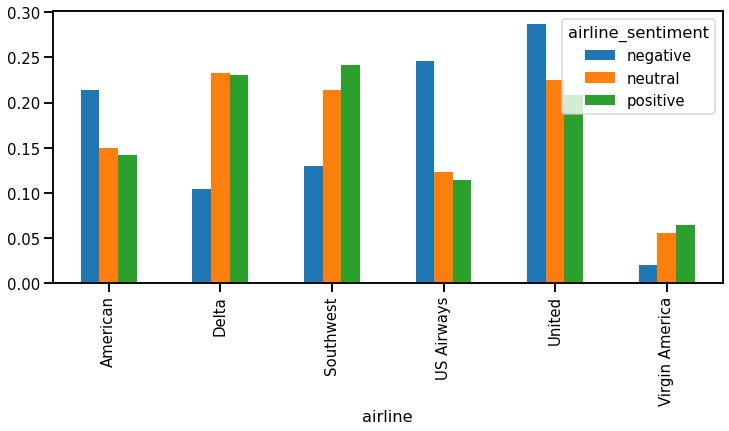

In [14]:
plt.rcParams['figure.figsize'] = (12, 5)
pd.crosstab(df1.airline, df1.airline_sentiment, normalize='columns').plot(kind='bar');

In [15]:
df1['airline_sentiment'].value_counts(normalize=True)*100

negative    62.691257
neutral     21.168033
positive    16.140710
Name: airline_sentiment, dtype: float64

In [16]:
df1['airline'].value_counts(normalize=True)*100

United            26.106557
US Airways        19.897541
American          18.845628
Southwest         16.530055
Delta             15.177596
Virgin America     3.442623
Name: airline, dtype: float64

In [17]:
#sampling only negative sentiments

df1.query("airline_sentiment == 'negative'").sample(5, random_state=42)[['text']]

,text
1151,@united gate C 24 IAD. U released passengers to board w/others deplaning .50 peopleOn bridge while next flight board http://t.co/HfoF33iyhi
9111,@USAirways 1729 connecting in charlotte to houston. Mechanical issue determined while q'd to take off. And we checked our bags.
3326,@united installed and working are not the same. Kicked me out after an hour and wouldn't let me back in. Four wasted hours.
10891,"@USAirways now I am on flight to FLL, and told to take a train back to PBI to get my car. There are no trains to PBI!"
11322,@USAirways ...Loosing a lot of business by using Barclays. I cant believe that you cant apply for a card if you live in Iowa.


 - Looks indeed negative

In [18]:
#sampling only positive sentiments

df1.query("airline_sentiment == 'positive'").sample(5, random_state=42)[['text']]

,text
6396,@SouthwestAir thanks for your excellent response time and assistance! All set :)
8484,@JetBlue thanks. I appreciate your prompt response.
8417,"@JetBlue yes, with about 20 minutes to spare. FYI - your employees are amazing. Keep up the good work!"
11553,@USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏
8106,@JetBlue beautiful ride. Thanks again:)


- Looks indeed positive, lots of emojies that need to be converted into text

In [19]:
df1.query("airline_sentiment == 'neutral'").sample(5, random_state=42)[['text']]

,text
3569,"@united we finally just arrive to Bogota, good but long flight!!"
13566,"@AmericanAir got a callback at 1 am, took care of it. thanks."
7452,@JetBlue is there wifi on he plain
6947,@JetBlue @BucketObolts Same
5585,@SouthwestAir how many are left?!


 - Looks 'neutrally' unclear, must be hard to separate from positive and negative (models scores will be decreased). Ideally, the 'neutral' class could be combined with 'positive' one, since they are not 'negative'.

### Insights:

- Significantly more 'negatives' vs. 'positive' and 'neutral', classes are unbalanced.
- More negatives for larger (older?) airlines, such as United
- More positives for smaller (younger?) airlines, such as Virgin America
- Emoji need to be converted to text, since it is all about sentiments

### Text pre-processing: Data preparation

#### Part A: before Tokenization
 - a. Html tag removal
 - b. Translate emoji
 - c. Replace contructions
 - d. Remove the numbers.

 - e. <b>Tokenization</b>

#### Part B: after Tokenization
 - f. Removal of Non-ASCII, Special Characters and Punctuations
 - g. Conversion to lowercase
 - h. Removal of stopwords
 - i. Lemmitization
 - j. Join the words in the list to convert back to text string in the dataframe
 - k. Print first and last 5 rows of data after pre-processing

### Part A

In [20]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def translate_emoji(text):
    """Translate emoji into english words"""
    text_1 = emoji.demojize(text)
    text_2 = str(text_1.split('_')) #after emoji conversion, words are joined by "_", which is removed here
    return text_2

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text


In [21]:
df2=df1.copy()

In [22]:
df2['text'] = df2['text'].apply(lambda x: strip_html(x))
df2.sample(5, random_state=42)

,airline_sentiment,airline,text
4794,positive,Southwest,@SouthwestAir you're my early frontrunner for best airline! #oscars2016
10480,negative,US Airways,@USAirways how is it that my flt to EWR was Cancelled Flightled yet flts to NYC from USAirways are still flying?
8067,negative,Delta,@JetBlue what is going on with your BDL to DCA flights yesterday and today?! Why is every single one getting delayed?
8880,neutral,Delta,"@JetBlue do they have to depart from Washington, D.C.??"
8292,negative,Delta,@JetBlue I can probably find some of them. Are the ticket #s on there?


> Recommend not to replace fields as hard to analyze processing steps, also danger of overwriting variables and errors


In [23]:
df2['text'] = df2['text'].apply(lambda x: translate_emoji(x))

In [24]:
print(df1.loc[5504, ['airline_sentiment', 'text']])
print(df1.loc[13431, ['airline_sentiment', 'text']])

airline_sentiment                                               positive
text                 @SouthwestAir Ahah😃💕🎵 That is why\nI love SW✈❗(^^)❤
Name: 5504, dtype: object
airline_sentiment                                                                                                            negative
text                 @AmericanAir this is the biggest joke of #customerservice I've ever seen from a  ✈️ brand http://t.co/XHSUUpHeZe
Name: 13431, dtype: object


In [25]:
print(df2.loc[5504, ['airline_sentiment', 'text']])
print(df2.loc[13431, ['airline_sentiment', 'text']])

airline_sentiment                                                                                                                                                                          positive
text                 ['@SouthwestAir Ahah:grinning', 'face', 'with', 'big', 'eyes::two', 'hearts::musical', 'note: That is why\nI love SW:airplane::red', 'exclamation', 'mark:(^^):red', 'heart:']
Name: 5504, dtype: object
airline_sentiment                                                                                                                        negative
text                 ["@AmericanAir this is the biggest joke of #customerservice I've ever seen from a  :airplane: brand http://t.co/XHSUUpHeZe"]
Name: 13431, dtype: object


 - Emoji were successefully translated

In [26]:
df2.tail()

,airline_sentiment,airline,text
14635,positive,American,['@AmericanAir thank you we got on a different flight to Chicago.']
14636,negative,American,"[""@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc""]"
14637,neutral,American,['@AmericanAir Please bring American Airlines to #BlackBerry10']
14638,negative,American,"[""@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??""]"
14639,neutral,American,['@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']


In [27]:
df2['text'] = df2['text'].apply(lambda x: replace_contractions(x))

df2.tail()

,airline_sentiment,airline,text
14635,positive,American,['@AmericanAir thank you we got on a different flight to Chicago.']
14636,negative,American,"[""@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. that is called shitty customer svc""]"
14637,neutral,American,['@AmericanAir Please bring American Airlines to #BlackBerry10']
14638,negative,American,"[""@AmericanAir you have my money, you change my flight, and do not answer your phones! Any other suggestions so I can make my commitment??""]"
14639,neutral,American,['@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']


In [28]:
df2['text'] = df2['text'].apply(lambda x: remove_numbers(x))
df2.tail()

,airline_sentiment,airline,text
14635,positive,American,['@AmericanAir thank you we got on a different flight to Chicago.']
14636,negative,American,"[""@AmericanAir leaving over minutes Late Flight. No warnings or communication until we were minutes Late Flight. that is called shitty customer svc""]"
14637,neutral,American,['@AmericanAir Please bring American Airlines to #BlackBerry']
14638,negative,American,"[""@AmericanAir you have my money, you change my flight, and do not answer your phones! Any other suggestions so I can make my commitment??""]"
14639,neutral,American,['@AmericanAir we have ppl so we need know how many seats are on the next flight. Plz put us on standby for people on the next flight?']


### Tokenization

In [29]:
df2['text'] = df2.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

df2.tail()

,airline_sentiment,airline,text
14635,positive,American,"[[, ', @, AmericanAir, thank, you, we, got, on, a, different, flight, to, Chicago, ., ', ]]"
14636,negative,American,"[[, ``, @, AmericanAir, leaving, over, minutes, Late, Flight, ., No, warnings, or, communication, until, we, were, minutes, Late, Flight, ., that, is, called, shitty, customer, svc, '', ]]"
14637,neutral,American,"[[, ', @, AmericanAir, Please, bring, American, Airlines, to, #, BlackBerry, ', ]]"
14638,negative,American,"[[, ``, @, AmericanAir, you, have, my, money, ,, you, change, my, flight, ,, and, do, not, answer, your, phones, !, Any, other, suggestions, so, I, can, make, my, commitment, ?, ?, '', ]]"
14639,neutral,American,"[[, ', @, AmericanAir, we, have, ppl, so, we, need, know, how, many, seats, are, on, the, next, flight, ., Plz, put, us, on, standby, for, people, on, the, next, flight, ?, ', ]]"


 - Customizing stopwords list

In [30]:
stopwords = stopwords.words('english')

customlist_to_remove = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

customlist_to_add = ['http://t.co/XHSUUpHeZe', 'http', 'tcoxhsuupheze'] #found in text, must be remains from scraping..
# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist_to_remove))      
stopwords += set(customlist_to_add)

In [31]:
stopwords

['into',
 'more',
 "she's",
 've',
 'on',
 'because',
 'same',
 'their',
 'through',
 'i',
 'below',
 'is',
 'she',
 'themselves',
 'that',
 'been',
 "don't",
 'from',
 'itself',
 'm',
 'between',
 'had',
 'off',
 "that'll",
 'own',
 'its',
 'doing',
 'over',
 'other',
 'if',
 'only',
 'our',
 'aren',
 'they',
 'which',
 'the',
 'why',
 'both',
 're',
 'for',
 'under',
 'has',
 'ours',
 'couldn',
 'my',
 'in',
 'her',
 'ain',
 'during',
 'nor',
 'than',
 'll',
 'then',
 'your',
 'being',
 'me',
 'by',
 'were',
 'down',
 'here',
 'this',
 "you'll",
 'o',
 'him',
 'with',
 'having',
 'all',
 'just',
 'am',
 's',
 "it's",
 'any',
 'we',
 'yourself',
 'as',
 'can',
 "you're",
 'an',
 'such',
 'very',
 'but',
 'theirs',
 "aren't",
 'those',
 'his',
 'what',
 'each',
 'don',
 'against',
 'further',
 'too',
 'to',
 'up',
 'be',
 'hers',
 'should',
 'who',
 'myself',
 'no',
 "you've",
 'until',
 'was',
 'do',
 'once',
 'some',
 'at',
 'about',
 "should've",
 'a',
 'or',
 'will',
 'before',
 'y

### Part B

In [32]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)


 - Part B pre-processing is summarized by function 'normalize'
 - Printing last and first rows after entire pre-processing

In [33]:
df2['text'] = df2.apply(lambda row: normalize(row['text']), axis=1)
df2.tail()

,airline_sentiment,airline,text
14635,positive,American,americanair thank get different flight chicago
14636,negative,American,americanair leave minutes late flight warn communication minutes late flight call shitty customer svc
14637,neutral,American,americanair please bring american airlines blackberry
14638,negative,American,americanair money change flight not answer phone suggestions make commitment
14639,neutral,American,americanair ppl need know many seat next flight plz put us standby people next flight


In [34]:
df2.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,virginamerica dhepburn say
1,positive,Virgin America,virginamerica plus add commercials experience tacky
2,neutral,Virgin America,virginamerica not today must mean need take another trip
3,negative,Virgin America,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,Virgin America,virginamerica really big bad thing


In [35]:
print(df2.loc[5504, ['airline_sentiment', 'text']])
print(df2.loc[13431, ['airline_sentiment', 'text']])

airline_sentiment                                                                                                             positive
text                 southwestair ahah grin face big eye two hearts musical note whyni love sw airplane red exclamation mark red heart
Name: 5504, dtype: object
airline_sentiment                                                            negative
text                 americanair biggest joke customerservice ever see airplane brand
Name: 13431, dtype: object


 - Former emojis look as a normal text now

### Vectorization: 
 - CountVectorizer and predictive modeling (Logistic Regression)
 - TfidfVectorizer and predictive modeling (Logistic Regression)

### Count Vectorizer

In [36]:
# Vectorization (Convert text data to numbers).

vectorizer = CountVectorizer(max_features=1500)   # Keep only 1500 features as number of features is ~ only 15,000 
                                                  #(# of rows better at least x10 larger than # of columns)


In [37]:
vectorizer.fit(df2['text'])


CountVectorizer(max_features=1500)

In [38]:
voc_list = vectorizer.get_feature_names()
voc_list.sort()
voc_list

['aa',
 'aadvantage',
 'able',
 'absolute',
 'absolutely',
 'absurd',
 'accept',
 'acceptable',
 'access',
 'accommodate',
 'accord',
 'account',
 'acct',
 'accurate',
 'across',
 'act',
 'action',
 'actual',
 'actually',
 'add',
 'additional',
 'address',
 'admirals',
 'advance',
 'advantage',
 'advertise',
 'advise',
 'advisory',
 'affect',
 'afford',
 'afternoon',
 'age',
 'agent',
 'agents',
 'ago',
 'ah',
 'ahead',
 'air',
 'aircraft',
 'airfare',
 'airline',
 'airlines',
 'airplane',
 'airport',
 'airports',
 'airways',
 'alert',
 'alist',
 'allow',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'alternate',
 'although',
 'always',
 'amaze',
 'america',
 'american',
 'americanair',
 'americanairlines',
 'among',
 'amount',
 'angry',
 'announce',
 'announcement',
 'annoy',
 'another',
 'answer',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apologies',
 'apologize',
 'apology',
 'app',
 'apparently',
 'appear',
 'appease',
 'apply',
 'appreciate',
 'approach'

#### Assigning numbered 'sentiment_score' instead of object text in 'airline_sentiment' for easier classification

In [39]:
df2['sentiment_score'] = 0
df2.head()

,airline_sentiment,airline,text,sentiment_score
0,neutral,Virgin America,virginamerica dhepburn say,0
1,positive,Virgin America,virginamerica plus add commercials experience tacky,0
2,neutral,Virgin America,virginamerica not today must mean need take another trip,0
3,negative,Virgin America,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,0
4,negative,Virgin America,virginamerica really big bad thing,0


In [40]:
df2.loc[(df2['airline_sentiment']=='negative'), 'sentiment_score'] = -1
df2.loc[(df2['airline_sentiment']=='positive'), 'sentiment_score'] = 1

df2.head()

,airline_sentiment,airline,text,sentiment_score
0,neutral,Virgin America,virginamerica dhepburn say,0
1,positive,Virgin America,virginamerica plus add commercials experience tacky,1
2,neutral,Virgin America,virginamerica not today must mean need take another trip,0
3,negative,Virgin America,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,-1
4,negative,Virgin America,virginamerica really big bad thing,-1


In [41]:
print(df2['airline_sentiment'].value_counts(normalize=True))
print(df2['sentiment_score'].value_counts(normalize=True))

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64
-1    0.626913
 0    0.211680
 1    0.161407
Name: sentiment_score, dtype: float64


> Conversion is matching the original sentiment classes

In [42]:
data_features = vectorizer.transform(df2['text']).toarray()   # Convert the data features to array.


data_features = data_features    # X data                 

In [43]:
data_features.shape

(14640, 1500)

 - 1500 < 14640, looks OK

#### Assigning data for X and y, splitting the data  

In [44]:
labels = df2['sentiment_score']
labels = labels.astype(int)

In [45]:
# Split data into training and testing set.

X_train, X_test, y_train, y_test = train_test_split(data_features, 
                                                    labels, 
                                                    test_size=0.25, 
                                                    stratify=labels, 
                                                    random_state=423)

### Logistic Regression as base model (fast classification)
 - Plus with 'class_weight' hyperparameter, which is better for the unbalanced data as this one
  - 'Neutral' sentiments are the most difficult to distinguish, so that it gets the highest weight 

In [47]:
logreg = LogisticRegression(random_state=856, 
                            fit_intercept=False, 
                            solver='liblinear',  
                            class_weight={-1:0.1, 0:0.6, 1:0.3}, 
                            max_iter=100)

logreg = logreg.fit(X_train, y_train)

print(logreg)

print(np.mean(cross_val_score(logreg, data_features, labels, cv=10)))

LogisticRegression(class_weight={-1: 0.1, 0: 0.6, 1: 0.3}, fit_intercept=False,
                   random_state=856, solver='liblinear')
0.7437841530054645


#### Model Evaluation and Confusion Matrix

In [48]:
logr_pred = logreg.predict(X_test)

print(classification_report(y_test, logr_pred))

              precision    recall  f1-score   support

          -1       0.90      0.83      0.86      2294
           0       0.55      0.70      0.62       775
           1       0.74      0.71      0.73       591

    accuracy                           0.78      3660
   macro avg       0.73      0.75      0.74      3660
weighted avg       0.80      0.78      0.79      3660



[[1894  323   77]
 [ 161  546   68]
 [  57  115  419]]


<AxesSubplot:>

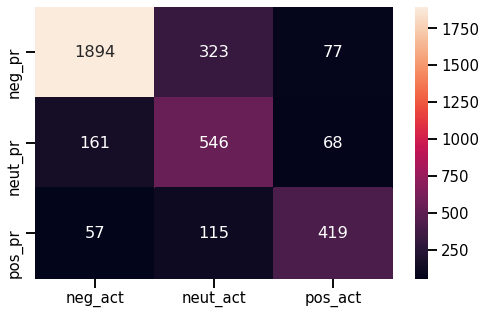

In [50]:
conf_mat = confusion_matrix(y_test, logr_pred)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['-1','0','1']],
                  columns = [i for i in ['-1','0','1']])
plt.figure(figsize = (8,5))
sns.heatmap(df_cm, 
            annot=True, 
            fmt='g',
            xticklabels=['neg_act','neut_act','pos_act'],
            yticklabels=['neg_pr','neut_pr','pos_pr'],
           )

In [51]:
preciss=[]
f1s=[]
recalls=[]

In [58]:
precis = precision_score(y_test, logr_pred, average='weighted')
precis = round(precis,2)

f1=f1_score(y_test, logr_pred, average='weighted')
f1=round(f1, 2)

recall=recall_score(y_test, logr_pred, average='weighted')
recall=round(recall,2)

print("Logistic Regression classifier with Count Vectorizer Precision, Recall and F1: ", precis, recall, f1)

preciss.append(precis)
f1s.append(f1)
recalls.append(recall)

Logistic Regression classifier with Count Vectorizer Precision, Recall and F1:  0.8 0.78 0.79


> Decent performance with best for the 'negative' class and worse for 'neutral' class, as expected

### TFIDF 

In [60]:
# Using TfidfVectorizer to convert text data to numbers

vectorizer = TfidfVectorizer(max_features=1500,
                            max_df=1.0)            #will be tuned from default

data_features = vectorizer.fit_transform(df2['text'])

data_features = data_features.toarray()

data_features.shape


(14640, 1500)

In [67]:
#TfidfVectorizer?

In [62]:
# Split data into training and testing set after this vectorization

X_train, X_test, y_train, y_test = train_test_split(data_features, 
                                                    labels, 
                                                    test_size=0.25, 
                                                    stratify=labels, 
                                                    random_state=423)

### Logistic Regression as base model

In [63]:
logreg = LogisticRegression(random_state=856, 
                            fit_intercept=False, 
                            solver='liblinear',  
                            class_weight={-1:0.1, 0:0.6, 1:0.3}, 
                            max_iter=100)

logreg = logreg.fit(X_train, y_train)

print(logreg)

print(np.mean(cross_val_score(logreg, data_features, labels, cv=10)))

LogisticRegression(class_weight={-1: 0.1, 0: 0.6, 1: 0.3}, fit_intercept=False,
                   random_state=856, solver='liblinear')
0.7523224043715847


#### Model Evaluation and Confusion Matrix

In [64]:
logr_pred = logreg.predict(X_test)

print(classification_report(y_test, logr_pred))

              precision    recall  f1-score   support

          -1       0.88      0.86      0.87      2294
           0       0.57      0.69      0.62       775
           1       0.79      0.64      0.70       591

    accuracy                           0.79      3660
   macro avg       0.75      0.73      0.73      3660
weighted avg       0.80      0.79      0.79      3660



[[1967  278   49]
 [ 185  537   53]
 [  85  129  377]]


<AxesSubplot:>

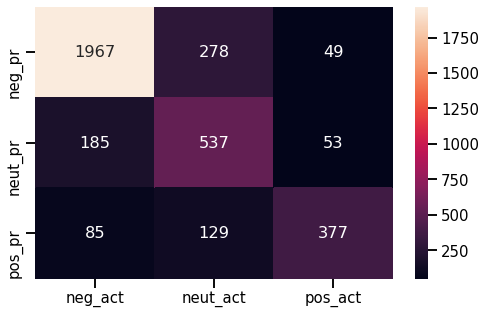

In [65]:
conf_mat = confusion_matrix(y_test, logr_pred)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['-1','0','1']],
                  columns = [i for i in ['-1','0','1']])
plt.figure(figsize = (8,5))
sns.heatmap(df_cm, 
            annot=True, 
            fmt='g',
            xticklabels=['neg_act','neut_act','pos_act'],
            yticklabels=['neg_pr','neut_pr','pos_pr'],
           )

In [66]:
precis = precision_score(y_test, logr_pred, average='weighted')
precis = round(precis,2)

f1=f1_score(y_test, logr_pred, average='weighted')
f1=round(f1, 2)

recall=recall_score(y_test, logr_pred, average='weighted')
recall=round(recall,2)

print("Logistic Regression classifier with TFIDF Precision, Recall and F1: ", precis, recall, f1)

preciss.append(precis)
f1s.append(f1)
recalls.append(recall)

Logistic Regression classifier with TFIDF Precision, Recall and F1:  0.8 0.79 0.79


> Slightly better scores with TFIDf, especially for 'neutral' problematic class

### Hyperparam Tuning

* TFIDf parameters
* Random Forest Classifier
* GradientBoosting Classifier

In [102]:
# TFIDf parameters: max_features, ngram_range and max_df

vectorizer = TfidfVectorizer(max_features=1500,  # 1500 is best found
                            max_df=0.5,
                            ngram_range=(1,1))   # unigrams are best found

data_features = vectorizer.fit_transform(df2['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 1500)

In [103]:
#Splitting the data again, as data_features are different here 

X_train, X_test, y_train, y_test = train_test_split(data_features, 
                                                    labels, 
                                                    test_size=0.25, 
                                                    stratify=labels, 
                                                    random_state=423)

 - Checking Logistic Regression for comparision

In [98]:
logreg = LogisticRegression(random_state=856, 
                            fit_intercept=False, 
                            solver='liblinear',  
                            class_weight={-1:0.1, 0:0.6, 1:0.3}, 
                            max_iter=100)

logreg = logreg.fit(X_train, y_train)

print(logreg)

print(np.mean(cross_val_score(logreg, data_features, labels, cv=10)))

LogisticRegression(class_weight={-1: 0.1, 0: 0.6, 1: 0.3}, fit_intercept=False,
                   random_state=856, solver='liblinear')
0.7523224043715847


 - Same accuracy score as before, although important metrics here are precision, recall and f1-scores (since data is unbalanced).

#### Model Evaluation and Confusion Matrix

In [99]:
logr_pred = logreg.predict(X_test)

print(classification_report(y_test, logr_pred))

              precision    recall  f1-score   support

          -1       0.88      0.86      0.87      2294
           0       0.57      0.69      0.62       775
           1       0.79      0.64      0.70       591

    accuracy                           0.79      3660
   macro avg       0.75      0.73      0.73      3660
weighted avg       0.80      0.79      0.79      3660



[[1967  278   49]
 [ 185  537   53]
 [  85  129  377]]


<AxesSubplot:>

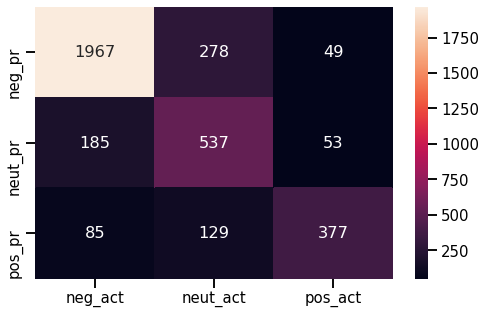

In [100]:
conf_mat = confusion_matrix(y_test, logr_pred)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['-1','0','1']],
                  columns = [i for i in ['-1','0','1']])
plt.figure(figsize = (8,5))
sns.heatmap(df_cm, 
            annot=True, 
            fmt='g',
            xticklabels=['neg_act','neut_act','pos_act'],
            yticklabels=['neg_pr','neut_pr','pos_pr'],
           )

In [101]:
precis = precision_score(y_test, logr_pred, average='weighted')
precis = round(precis,2)

f1=f1_score(y_test, logr_pred, average='weighted')
f1=round(f1, 2)

recall=recall_score(y_test, logr_pred, average='weighted')
recall=round(recall,2)

print("Logistic Regression classifier with TFIDF-tuned Precision, Recall and F1: ", precis, recall, f1)

preciss.append(precis)
f1s.append(f1)
recalls.append(recall)

Logistic Regression classifier with TFIDF-tuned Precision, Recall and F1:  0.8 0.79 0.79


> Same performnce vs. previous TFIDf, tuning didn't help here

### Random Forest Classifier

In [104]:
forest = RandomForestClassifier(n_estimators=50, 
                                n_jobs=5,
                                class_weight={-1:0.1, 0:0.6, 1:0.3})

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(class_weight={-1: 0.1, 0: 0.6, 1: 0.3}, n_estimators=50,
                       n_jobs=5)
0.7326502732240437


#### Model Evaluation and Confusion Matrix

In [105]:
forest_pred = forest.predict(X_test)
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

          -1       0.83      0.91      0.87      2294
           0       0.62      0.55      0.58       775
           1       0.76      0.60      0.67       591

    accuracy                           0.78      3660
   macro avg       0.74      0.69      0.71      3660
weighted avg       0.77      0.78      0.78      3660



[[2080  168   46]
 [ 283  426   66]
 [ 145   90  356]]


<AxesSubplot:>

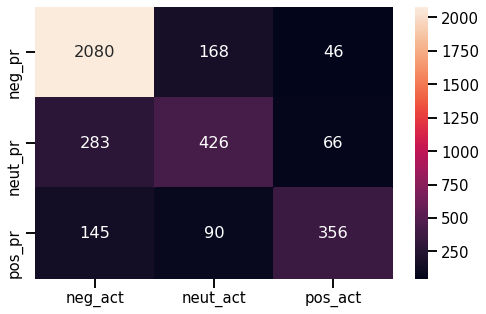

In [106]:
conf_mat = confusion_matrix(y_test, forest_pred)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['-1','0','1']],
                  columns = [i for i in ['-1','0','1']])
plt.figure(figsize = (8,5))
sns.heatmap(df_cm, 
            annot=True, 
            fmt='g',
            xticklabels=['neg_act','neut_act','pos_act'],
            yticklabels=['neg_pr','neut_pr','pos_pr'],
           )

In [107]:
precis = precision_score(y_test, forest_pred, average='weighted')
precis = round(precis,2)

f1=f1_score(y_test, forest_pred, average='weighted')
f1=round(f1, 2)

recall=recall_score(y_test, forest_pred, average='weighted')
recall=round(recall,2)

print("Random Forest classifier with TFIDF-tuned Precision, Recall and F1: ", precis, recall, f1)

preciss.append(precis)
f1s.append(f1)
recalls.append(recall)

Random Forest classifier with TFIDF-tuned Precision, Recall and F1:  0.77 0.78 0.78


> Slightly worse performnce vs. Logistic Regression, 'negative' class is overfit on recalls

### GradientBoosting Classifier

In [111]:
#GradientBoostingClassifier?

In [120]:
gbcl = GradientBoostingClassifier(n_estimators=50, 
                                    random_state=473,
                                    learning_rate=0.5,
                                    max_depth=10,
                                    max_features='sqrt',
                                    warm_start=True)

gbcl = gbcl.fit(X_train, y_train)

print(gbcl)

print(np.mean(cross_val_score(gbcl, data_features, labels, cv=10)))

GradientBoostingClassifier(learning_rate=0.5, max_depth=10, max_features='sqrt',
                           n_estimators=50, random_state=473, warm_start=True)
0.728688524590164


#### Model Evaluation and Confusion Matrix

In [121]:
gbcl_pred = gbcl.predict(X_test)
print(classification_report(y_test, gbcl_pred))

              precision    recall  f1-score   support

          -1       0.80      0.92      0.85      2294
           0       0.61      0.42      0.49       775
           1       0.71      0.61      0.66       591

    accuracy                           0.76      3660
   macro avg       0.71      0.65      0.67      3660
weighted avg       0.74      0.76      0.75      3660



[[2101  119   74]
 [ 384  322   69]
 [ 143   90  358]]


<AxesSubplot:>

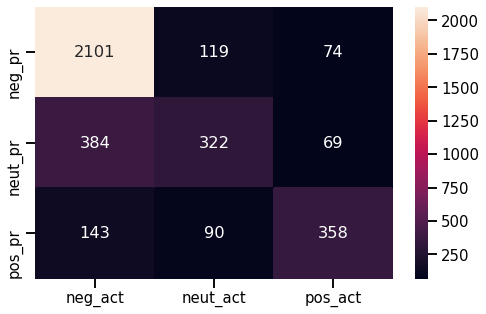

In [122]:
conf_mat = confusion_matrix(y_test, gbcl_pred)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['-1','0','1']],
                  columns = [i for i in ['-1','0','1']])
plt.figure(figsize = (8,5))
sns.heatmap(df_cm, 
            annot=True, 
            fmt='g',
            xticklabels=['neg_act','neut_act','pos_act'],
            yticklabels=['neg_pr','neut_pr','pos_pr'],
           )

In [123]:
precis = precision_score(y_test, gbcl_pred, average='weighted')
precis = round(precis,2)

f1=f1_score(y_test, gbcl_pred, average='weighted')
f1=round(f1, 2)

recall=recall_score(y_test, gbcl_pred, average='weighted')
recall=round(recall,2)

print("GradientBoosting classifier with TFIDF-tuned Precision, Recall and F1: ", precis, recall, f1)

preciss.append(precis)
f1s.append(f1)
recalls.append(recall)

GradientBoosting classifier with TFIDF-tuned Precision, Recall and F1:  0.74 0.76 0.75


> Worse performnce vs. Logistic Regression, 'negative' class is higher on recall, which dropped recalls for 'positive' and 'neutral'. This can be because the algorithm doesn't have 'class_weight' hyperparameter.

In [124]:
models=['LogisticRegression_CountVect', 'LogisticRegression_TFIDf','LogisticRegression_TFIDf_tuned' ,'RandomForest','GradientBoosting']

resultsDf = pd.DataFrame({'Method':models, 'precision': preciss, 'recall': recalls, 'f1-score': f1s})
resultsDf = resultsDf[['Method', 'precision', 'recall', 'f1-score']]
resultsDf

,Method,precision,recall,f1-score
0,LogisticRegression_CountVect,0.80,0.78,0.79
1,LogisticRegression_TFIDf,0.80,0.79,0.79
2,LogisticRegression_TFIDf_tuned,0.80,0.79,0.79
3,RandomForest,0.77,0.78,0.78
4,GradientBoosting,0.74,0.76,0.75


#### Insights:
 - Logistic Regression with TFIDf is the best performer among others 

### Summary:

- Airlines sentiments scraped from tweets were analyzed using text reviews in and their sentiment score on the scale of 'negative', 'neutral' and 'postive for text classification modeling.
- The dataset is relatively small, which limited choice of predictive algorithms and number of max_featues. Also, because of this, numbers were removed. If the dataset would be larger, numbers could be left to evaluate models.
- Classes are unbalanced (more for 'negative'), which drives using 'class_weight' hyperparameter in modeling.
- Class 'neutral' is hard to interpretate even for a human, and its is often confused with 'negative' or 'positive' classes. Ideally it could be combined with 'positive' class since it is not 'negative' one to increase models performance.
- The pre-precessed data was converted to numbers using Count Vectorizer and TFIDf. TFIDf resulted in better performance.
- Tuning TFIDf parameters did not give higher scores.
- Best score resulted from using TFIDf combined with Logistic Regression. Surprisingly, Random Forest and GradientBoosting classifiers performed worse.
- The model performances and lack of improving from tuning are likely results of the confusion between the 'neutral' class with two others. Various upsampling techniques can be way to improve.